## Weather Predict

create a machine learning program that will use historical data to predict the weather in Delhi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('data/DelhiClimateInfo.csv')
print(data.head())
print(data.tail())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
            date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [7]:
figure = px.line(data, x='date', y='meantemp', title='Mean Temprature in Delhi over the years')
figure.show()

In [10]:
figure = px.line(data, x='date', y='humidity', title='Mean Humidity in Delhi over the years')
figure.show()

In [12]:
figure = px.line(data, x='date', y='wind_speed', title='Mean Windspeed in Delhi over the years')
figure.show()

In [14]:
figure = px.scatter(data_frame = data, x='humidity', y='meantemp', size='meantemp', trendline = 'ols', title='The Relationship Between Temprature and Humidity')
figure.show()

In [20]:
# reformat the date column
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
# add a year and month column to the original dataframe
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

print(data.head())


        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


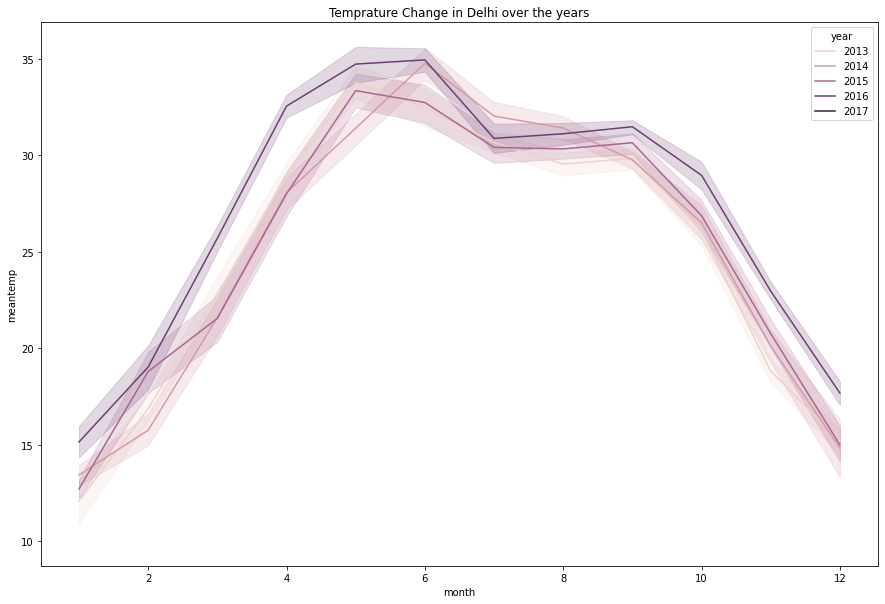

In [23]:
plt.figure(figsize=(15,10))
plt.title('Temprature Change in Delhi over the years')
sns.lineplot(data=data,x='month',y='meantemp',hue='year')
plt.show()

In [25]:
forecast_data = data.rename(columns={'date':'ds','meantemp':'y'})
print(forecast_data.head())

          ds          y   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


In [30]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)

predictions = model.predict(forecasts)
plot_plotly(model,predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\Kitteridge\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Kitteridge\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\Kitteridge\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

